In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('preprocessed_data_2.csv')

# Convert 'Price' column to numeric, converting non-numeric values to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)
df.dropna(inplace=True)

# Exclude 'Price' column from the features (X)
X = df.drop(columns=['Price'])

# Target variable (y) is 'Price'
y = df['Price']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(actual_vs_predicted)

Mean Squared Error (MSE): 14552351.390526077
Root Mean Squared Error (RMSE): 3814.754433843164
R-squared (R2): 0.9612994464099602
      Actual  Predicted
5370    2968    3154.66
5299   24108   25001.45
199     3251    3249.70
3268   11494   12272.11
3504    1482    1561.64
...      ...        ...
321     3463    3657.18
3491    6656    6066.32
4043    2657    2689.55
3945    6383    6055.96
3542    2712    2603.16

[1764 rows x 2 columns]


In [2]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
dataset = pd.read_csv('preprocessed_data_2.csv',thousands=',')




In [3]:
dataset

,Name of Commodity,Variation,Year,Month,Rainfall,Temperature,Humidity,Pesticide,Price
0,0,0,0,0,27,27,83,4333,1994
1,0,1,0,0,45,25,76,4333,1753
2,0,2,0,0,82,24,75,4333,1588
3,0,3,0,0,56,24,86,4333,2236
4,0,4,0,0,13,27,87,4333,3988
...,...,...,...,...,...,...,...,...,...
5875,45,21,1,11,8,27,74,4225,3521
5876,45,212,1,11,132,29,87,4225,2666
5877,45,213,1,11,199,27,81,4225,3207
5878,45,214,1,11,154,32,87,4225,1515


In [4]:
dataset = dataset.rename(columns={'Name of Commodity': 'Name'})

In [5]:
dataset

,Name,Variation,Year,Month,Rainfall,Temperature,Humidity,Pesticide,Price
0,0,0,0,0,27,27,83,4333,1994
1,0,1,0,0,45,25,76,4333,1753
2,0,2,0,0,82,24,75,4333,1588
3,0,3,0,0,56,24,86,4333,2236
4,0,4,0,0,13,27,87,4333,3988
...,...,...,...,...,...,...,...,...,...
5875,45,21,1,11,8,27,74,4225,3521
5876,45,212,1,11,132,29,87,4225,2666
5877,45,213,1,11,199,27,81,4225,3207
5878,45,214,1,11,154,32,87,4225,1515


In [6]:
dataset

,Name,Variation,Year,Month,Rainfall,Temperature,Humidity,Pesticide,Price
0,0,0,0,0,27,27,83,4333,1994
1,0,1,0,0,45,25,76,4333,1753
2,0,2,0,0,82,24,75,4333,1588
3,0,3,0,0,56,24,86,4333,2236
4,0,4,0,0,13,27,87,4333,3988
...,...,...,...,...,...,...,...,...,...
5875,45,21,1,11,8,27,74,4225,3521
5876,45,212,1,11,132,29,87,4225,2666
5877,45,213,1,11,199,27,81,4225,3207
5878,45,214,1,11,154,32,87,4225,1515


In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)


R-squared: 0.9612994464099602
Mean Absolute Error: 1247.4167006802722
Root Mean Squared Error: 3814.754433843164


   Name  Variation  Year  Month  Rainfall  Temperature  Humidity  Pesticide  \
0     0          0     0      0        27           27        83       4333   
1     0          1     0      0        45           25        76       4333   
2     0          2     0      0        82           24        75       4333   
3     0          3     0      0        56           24        86       4333   
4     0          4     0      0        13           27        87       4333   

   Price  
0   1994  
1   1753  
2   1588  
3   2236  
4   3988  
              Name    Variation         Year        Month     Rainfall  \
count  5880.000000  5880.000000  5880.000000  5880.000000  5880.000000   
mean     26.618367   100.685714     0.475510     5.500000   271.004762   
std      13.171870    67.648113     0.499442     3.452346   279.138597   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      16.000000    35.000000     0.000000     2.750000    47.000000   
50%      31.000

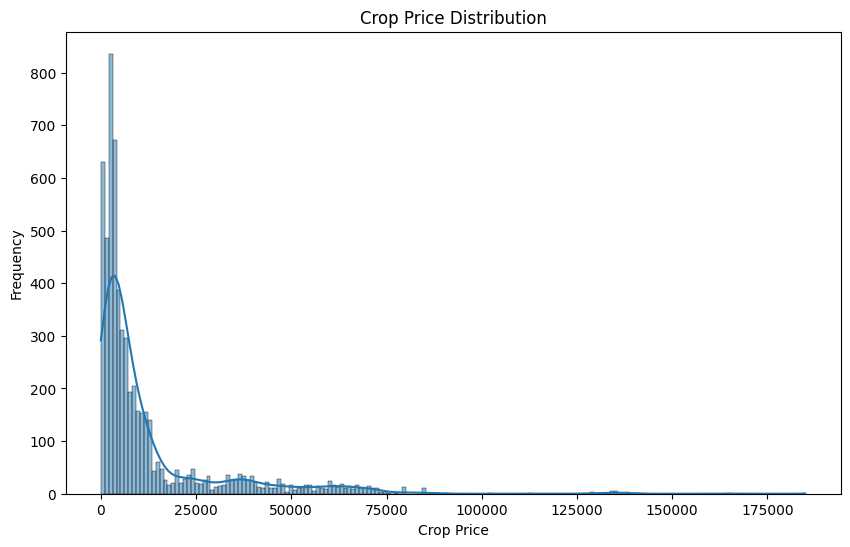

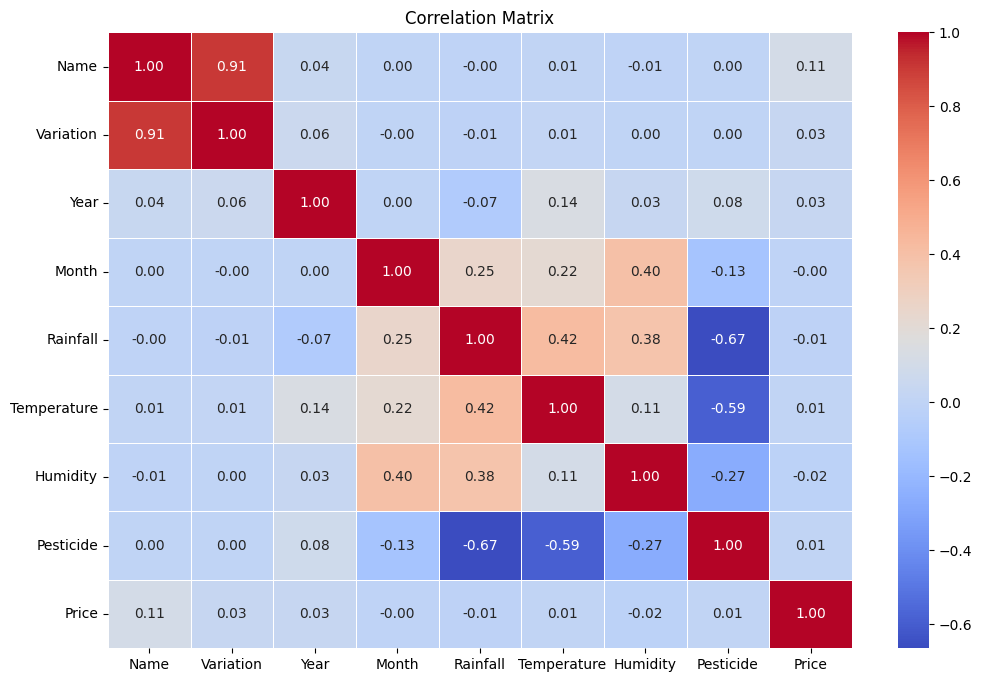

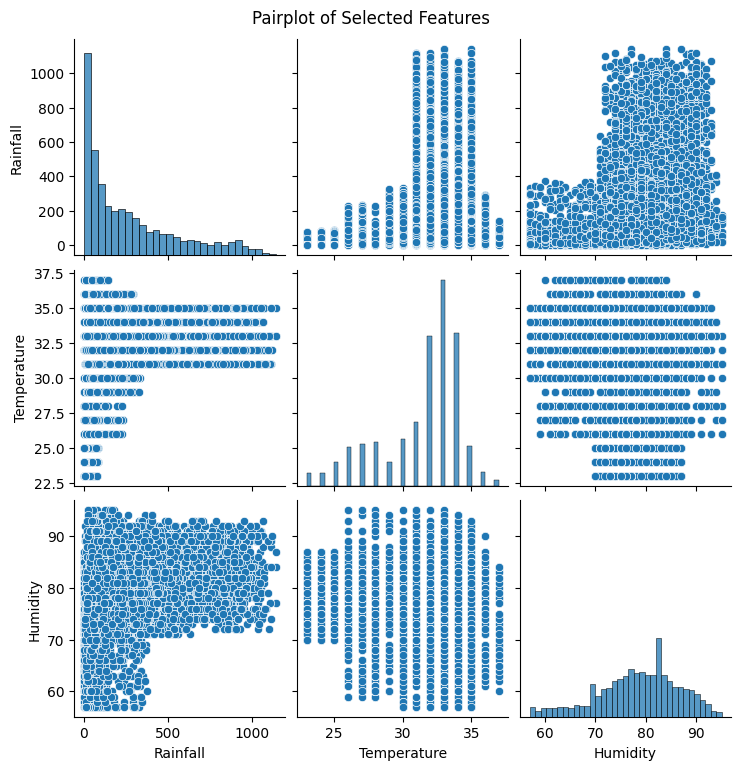

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = dataset
# Display the first few rows of the dataset
print(df.head())

# Summary statistics of numerical features
print(df.describe())



# Visualize the distribution of the target variable (crop price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Crop Price Distribution')
plt.xlabel('Crop Price')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix to identify feature correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features (e.g., rainfall, temperature, humidity)
selected_features = ['Rainfall', 'Temperature', 'Humidity']
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


In [9]:
from sklearn.feature_selection import VarianceThreshold
data = df
# Features and target
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Apply VarianceThreshold
selector = VarianceThreshold()
X_selected = selector.fit_transform(X)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print('Selected Features using VarianceThreshold:')
print(selected_features)

Selected Features using VarianceThreshold:
Index(['Name', 'Variation', 'Year', 'Month', 'Rainfall', 'Temperature',
       'Humidity', 'Pesticide'],
      dtype='object')


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Features and target

X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# SelectKBest with mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=3)  # Select top 3 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print('Selected Features using SelectKBest and Mutual Information:')
print(selected_features)


Selected Features using SelectKBest and Mutual Information:
Index(['Name', 'Variation', 'Month'], dtype='object')
